In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Fourier Analysis of 1-D Signals

In [2]:
%pylab inline
import scipy.signal
import IPython.display

Populating the interactive namespace from numpy and matplotlib


## Non-periodic square pulse

### Definition of the signal

$$
f(t) = 
\left\{
\begin{array}{l l}
1 & 0 \le t \le 1 \\
0 & \text{otherwise}
\end{array}
\right.
$$

In [3]:
t = linspace(-.5, 2.5, 301)
f = np.where((t >= 0) & (t <= 1), 1, 0)

### Fourier transform

$$
\begin{eqnarray}
F(\omega) 
&=& \int_{-\infty}^\infty f(t) \, e^{-\mathsf{i} \omega t} \, \mathsf{d}t \\
&=& \int_0^1 e^{-\mathsf{i} \omega t} \, \mathsf{d}t \\
&=& \left[ - \frac{1}{\mathsf{i} \omega} e^{-\mathsf{i} \omega t} \right]_0^1
 = - \frac{1}{\mathsf{i} \omega} \left( e^{-\mathsf{i} \omega} - 1 \right)
 = \frac{\mathsf{i}}{\omega} \left( e^{-\mathsf{i} \omega} - 1 \right)
\end{eqnarray}
$$

In [4]:
def FT(omega):
    # avoid division by omega == 0
    return 1j * (exp(-1j * omega) - 1) / omega if omega != 0 else 1 + 0j
FT = np.vectorize(FT, otypes=[np.complex])

In [5]:
omega = linspace(-20 * pi, 20 * pi, 401)
F = FT(omega)

### Plot the function in the time domain and the frequency domain

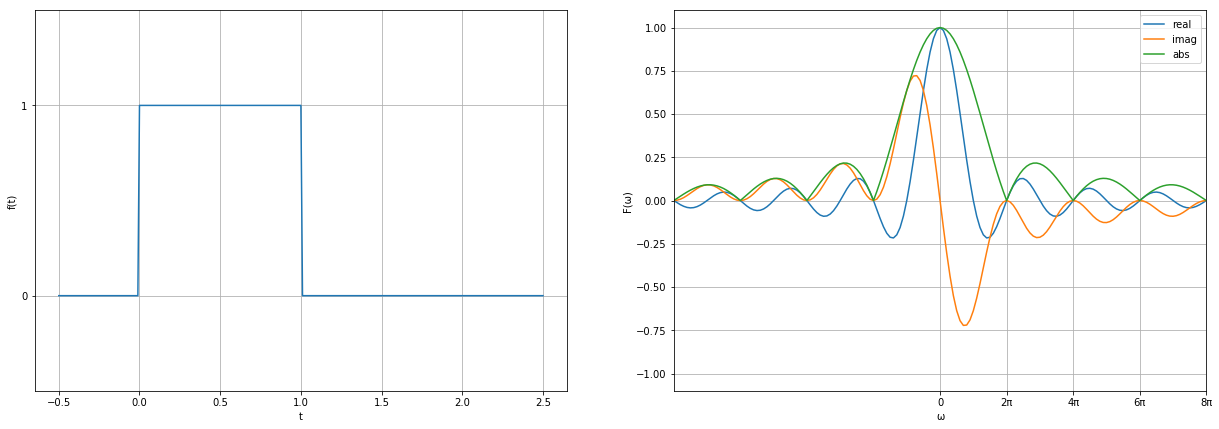

In [6]:
figure(figsize(21,7))
plt.subplot(1,2,1)
plt.plot(t, f)
plt.yticks([0, 1.0]), plt.ylim([-.5, 1.5])
plt.xlabel('t'), plt.ylabel('f(t)')
plt.grid();

plt.subplot(1,2,2)
plt.plot(omega, F.real)
plt.plot(omega, F.imag)
plt.plot(omega, abs(F))
labels = [0, u'2π', u'4π', u'6π', u'8π', u'10π', u'12π', u'14π', u'16π', u'18π', u'20π']
plt.xticks(np.arange(0, 21*pi, 2*pi), labels)
plt.xlim([-8*pi,8*pi]), plt.ylim([-1.1,1.1])
plt.xlabel(u'ω'), plt.ylabel(u'F(ω)')
plt.legend(['real', 'imag', 'abs'])
plt.grid();

## Periodic sinosoidal signal with constant frequencies

In [7]:
samplingrate = 16000 # Hz
duration = 2.048 # s
numsamples = int(samplingrate * duration) # samples
n = int(numsamples / 2)
t = linspace(0, duration, numsamples + 1)[0:numsamples]
f = linspace(0, samplingrate/2, n + 1)

In [8]:
a, b = 3.0, 1.0
signal1 = a * sin(2 * pi * 1000 * t) + b * sin(2 * pi * 4000 * t)

### Spectrogram

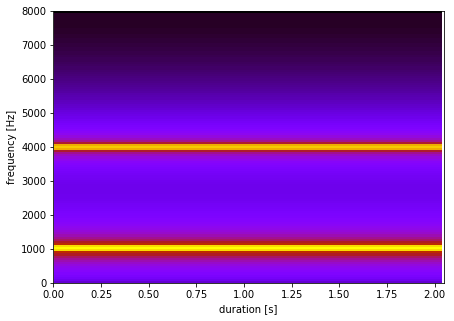

In [9]:
figure(figsize(7,5))
Pxx, freqs, bins, im = plt.specgram(signal1, NFFT=256, Fs=samplingrate, noverlap=160, cmap=plt.cm.gnuplot)
plt.xlim([0, duration]), plt.xlabel('duration [s]'), plt.ylabel('frequency [Hz]');

### Long-term spectrum

The signal is real-valued and has even length. 
Because the signal is real-valued, you only need power estimates for the positive OR the negative frequencies. 
In order to conserve the total power, multiply all frequencies that occur in both sets, i.e. the positive 
and negative frequencies, by a factor of 2. 
The zero frequency (DC) and the Nyquist frequency occur only once.

In [10]:
fft1 = np.fft.fft(signal1)[0:n+1]
psd1 = np.abs(fft1)**2 / (samplingrate * numsamples)
psd1[1:-1] = 2 * psd1[1:-1];

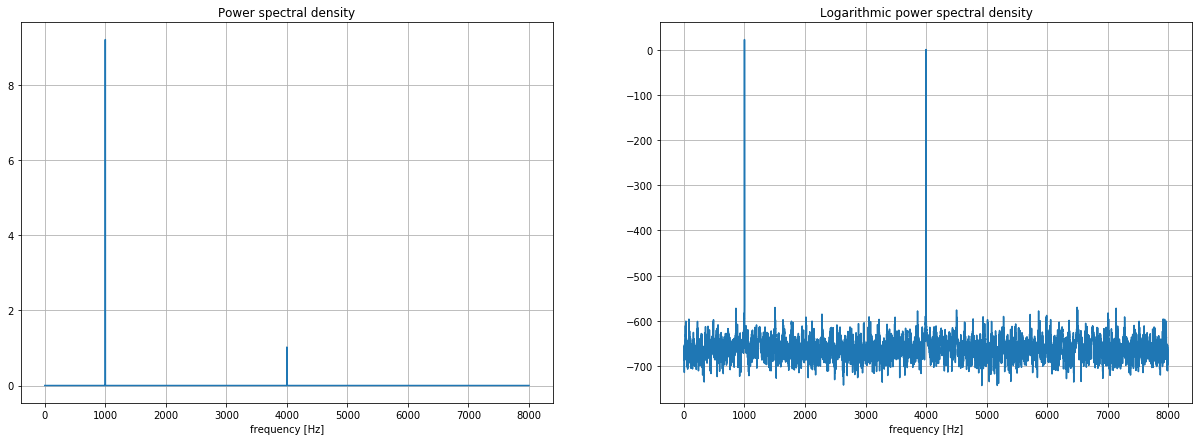

In [11]:
figure(figsize(21,7))
plt.subplot(1,2,1), plt.plot(f, psd1)
plt.xlabel('frequency [Hz]'), plt.grid(), plt.title('Power spectral density')
plt.subplot(1,2,2), plt.plot(f, 10 * np.log(psd1))
plt.xlabel('frequency [Hz]'), plt.grid(), plt.title('Logarithmic power spectral density');

### Question

The parameters $a$ and $b$ are the weights of the two sine components of the signal.
How do they influence the power spectrum?

## Piecewise defined sinosoidal signal

In [12]:
# first section
a = 0.5
nsamples = int(a * numsamples)
t1 = linspace(0, a * duration, nsamples + 1)[0:nsamples]
w = np.hanning(nsamples)
signal2a = sin(2 * pi * 1000 * t1) # * w


# second section
nsamples = int((1 - a) * numsamples)
t2 = linspace(0, (1 - a) * duration, nsamples + 1)[0:nsamples]
w = np.hanning(nsamples)
signal2b = sin(2 * pi * 4000 * t2) # * w

signal2 = np.append(signal2a, signal2b)

### Spectrogram

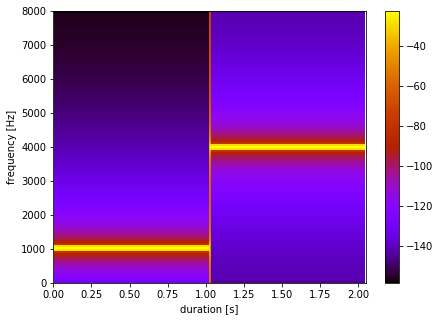

In [13]:
figure(figsize(7,5))
Pxx, freqs, bins, im = plt.specgram(signal2, NFFT=256, Fs=samplingrate, noverlap=160, cmap=plt.cm.gnuplot)
plt.xlim([0, duration]), plt.colorbar()
plt.xlabel('duration [s]'), plt.ylabel('frequency [Hz]');

### Long-term spectrum

In [14]:
fft2 = np.fft.fft(signal2)[0:n+1]
psd2 = np.abs(fft2)**2 / (samplingrate * numsamples)
psd2[1:-1] = 2 * psd2[1:-1];

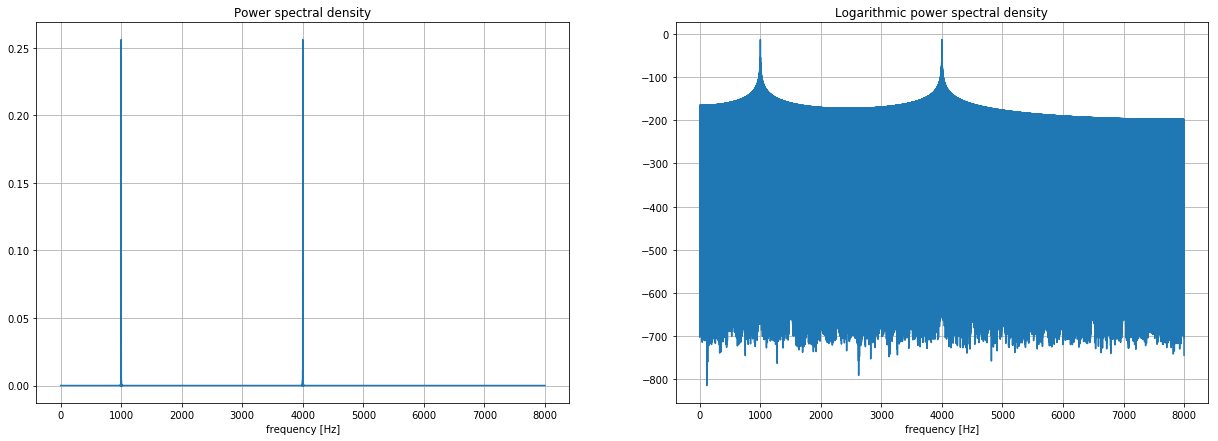

In [15]:
figure(figsize(21,7))
plt.subplot(1,2,1), plt.plot(f, psd2)
plt.xlabel('frequency [Hz]'), plt.grid(), plt.title('Power spectral density')
plt.subplot(1,2,2), plt.plot(f, 10 * np.log(psd2))
plt.xlabel('frequency [Hz]'), plt.grid(), plt.title('Logarithmic power spectral density');

### Questions

<ol>
<li>The parameter $a$ defines the ratio of the durations of the two sections. How does $a$ influence the power spectrum?</li><br>

<li>The logarithmic power spectrum looks quite different compared to the previous one. How can you explain the difference between both logarithmic power spectra?</li><br>

<li>What happens if a window function is applied to both sections?</li>
</ol>

## Chirp signal

In [16]:
# chirp: frequency increasing linearly (or quadratically) from 2000 Hz to 6000 Hz
signal3 = scipy.signal.chirp(t, 2000.0, duration, 6000.0, method='linear') # quadratic

### Spectrogram

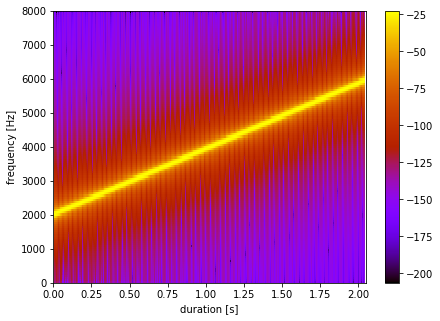

In [17]:
figure(figsize(7,5))
Pxx, freqs, bins, im = plt.specgram(signal3, NFFT=256, Fs=samplingrate, noverlap=160, cmap=plt.cm.gnuplot)
plt.xlim([0, duration]), plt.colorbar()
plt.xlabel('duration [s]'), plt.ylabel('frequency [Hz]');

### Long-term spectrum

In [18]:
fft3 = np.fft.fft(signal3)[0:n+1]
psd3 = np.abs(fft3)**2 / (samplingrate * numsamples)
psd3[1:-1] = 2 * psd3[1:-1];

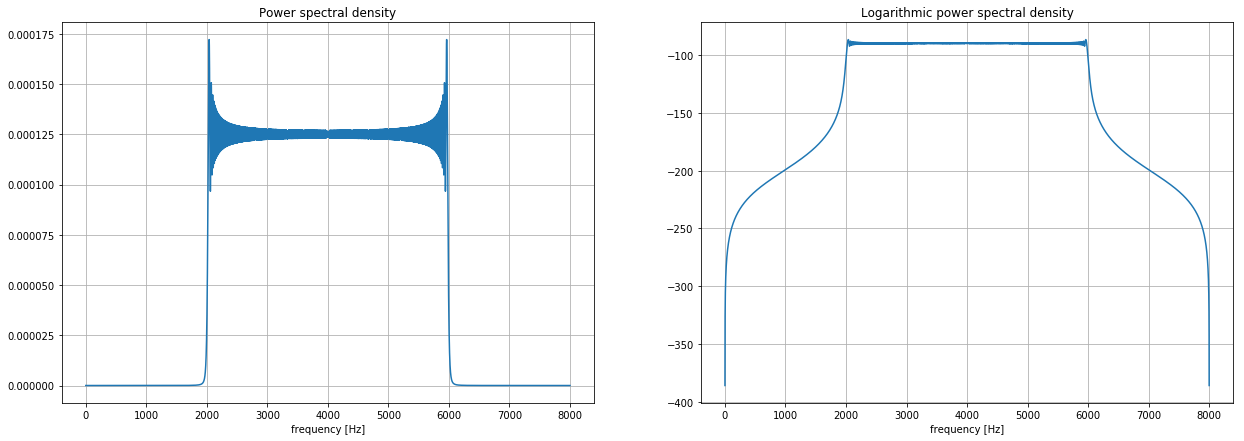

In [19]:
figure(figsize(21,7))
plt.subplot(1,2,1), plt.plot(f, psd3)
plt.xlabel('frequency [Hz]'), plt.grid(), plt.title('Power spectral density')
plt.subplot(1,2,2), plt.plot(f, 10 * np.log(psd3))
plt.xlabel('frequency [Hz]'), plt.grid(), plt.title('Logarithmic power spectral density');

### Apply a window function

#### Create a Tukey window

In [20]:
def tukey(N, alpha=0.5):
    x = linspace(0, N-1, N)
    a = 0.5 * alpha * (N - 1)
    b = (N - 1) * (1 - 0.5 * alpha)
    s1 = (0 <= x) & (x < a)
    s2 = (a <= x) & (x < b)
    s3 = (b <= x) & (x < N)
    r1 = lambda x: 0.5 * (1 + cos(pi * (2 * x / (alpha * (N-1)) - 1)))
    r3 = lambda x: 0.5 * (1 + cos(pi * (2 * x / (alpha * (N-1)) - 2 / alpha + 1)))
    w = np.piecewise(x, [s1, s2, s3], [r1, 1, r3])
    return w

In [21]:
w = tukey(numsamples, 0.05)
# w = np.hanning(numsamples)

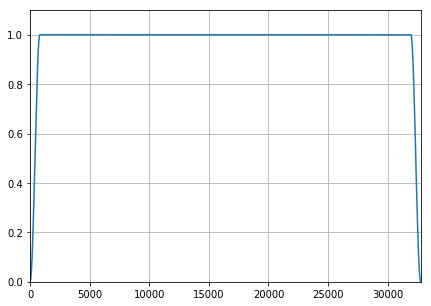

In [22]:
figure(figsize(7,5))
plt.plot(w), plt.grid()
plt.xlim([0, numsamples]), plt.ylim([0, 1.1]);

#### Apply the window function to the signal and compute the DFT

In [23]:
# chirp: frequency increasing linearly from 2000 Hz to 6000 Hz
signal4 = scipy.signal.chirp(t, 2000.0, duration, 6000.0, method='linear') * w

In [24]:
fft4 = np.fft.fft(signal4)[0:n+1]
psd4 = np.abs(fft4)**2 / (samplingrate * numsamples)
psd4[1:-1] = 2 * psd4[1:-1];

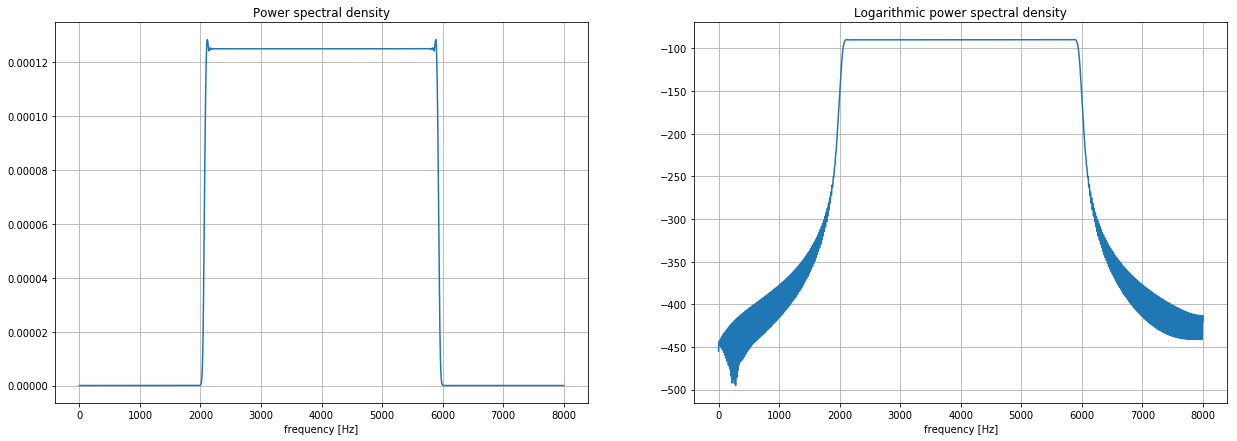

In [25]:
figure(figsize(21,7))
plt.subplot(1,2,1), plt.plot(f, psd4)
plt.xlabel('frequency [Hz]'), plt.grid(), plt.title('Power spectral density')
plt.subplot(1,2,2), plt.plot(f, 10 * np.log(psd4))
plt.xlabel('frequency [Hz]'), plt.grid(), plt.title('Logarithmic power spectral density');

### Questions

<ol>
<li>In this example, the power spectrum has the shape of the window function. Verify this by varying the Tukey window paramter $\alpha$ and by applying different window functions, e.g., the Hann window.</li><br>

<li>Why is this true in this example?</li><br>

<li>What happens if the frequency increases quadratically over time instead of linearly?</li>
</ol>

## Another example

In [26]:
nsamples = int(0.5 * numsamples)
t1 = linspace(0, 0.5 * duration, nsamples + 1)[0:nsamples]
signal5a = scipy.signal.chirp(t1, 6000.0, duration/2, 2000.0, method='linear')
signal5b = scipy.signal.chirp(t1, 2000.0, duration/2, 6000.0, method='linear')
signal5 = np.append(signal5a, signal5b) # * w

In [27]:
audio1 = IPython.display.Audio(signal5, rate=samplingrate)
audio1

### Signal at the beginning

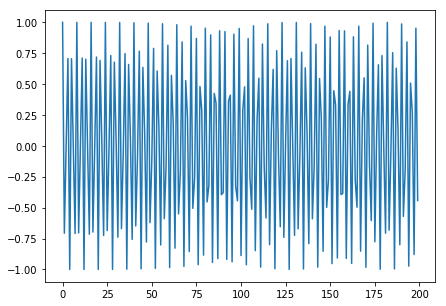

In [28]:
figure(figsize(7,5))
plt.plot(signal5[0:200]);

### Signal at 50% of the duration: smooth transition from decreasing to increasing frequencies

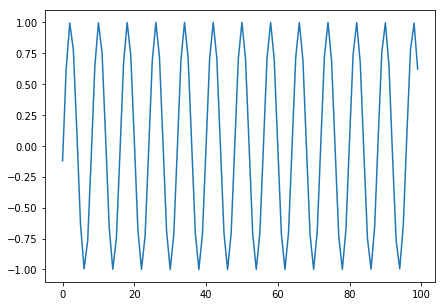

In [29]:
dt = 50
figure(figsize(7,5))
plt.plot(signal5[nsamples-dt:nsamples+dt]);

### Spectrogram

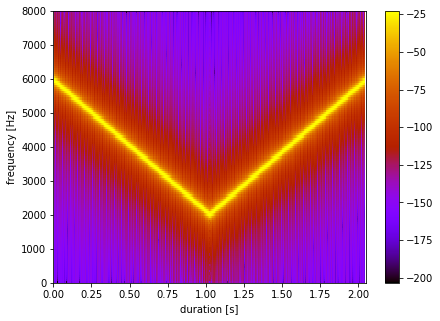

In [30]:
figure(figsize(7,5))
Pxx, freqs, bins, im = plt.specgram(signal5, NFFT=256, Fs=samplingrate, noverlap=160, cmap=plt.cm.gnuplot)
plt.xlim([0, duration]), plt.colorbar()
plt.xlabel('duration [s]'), plt.ylabel('frequency [Hz]');

### Long-term spectrum

In [31]:
fft5 = np.fft.fft(signal5)[0:n+1]
psd5 = np.abs(fft5)**2 / (samplingrate * numsamples)
psd5[1:-1] = 2 * psd5[1:-1];

In [32]:
fft5a = np.fft.fft(np.append(signal5a, zeros(n)))[0:n+1]
fft5b = np.fft.fft(np.append(zeros(n), signal5b))[0:n+1]

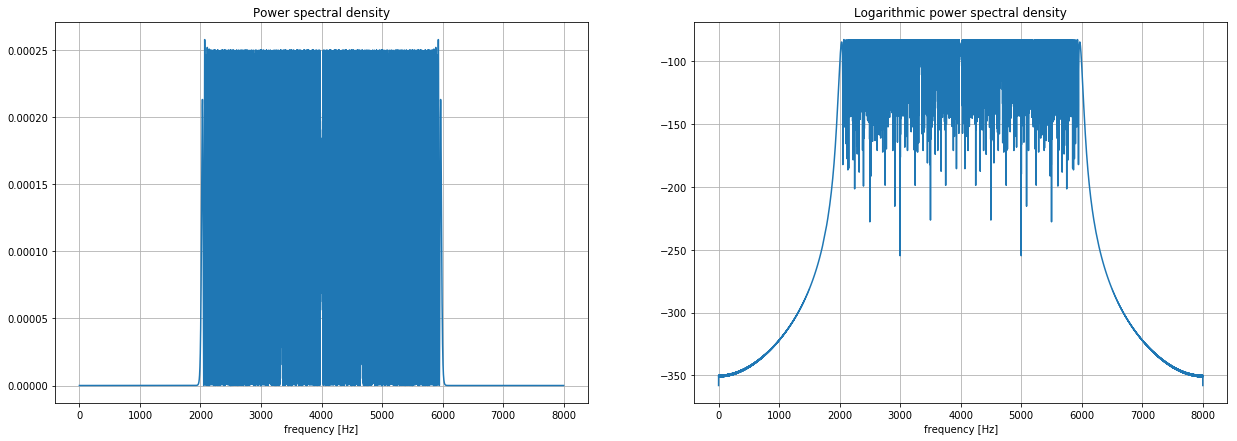

In [33]:
figure(figsize(21,7))
plt.subplot(1,2,1), plt.plot(f, psd5) # numpy.real(fft5[a|b]), numpy.imag(fft5[a|b]), numpy.abs(fft5[a|b])
plt.xlabel('frequency [Hz]'), plt.grid(), plt.title('Power spectral density')
plt.subplot(1,2,2), plt.plot(f, 10 * np.log(psd5))
plt.xlabel('frequency [Hz]'), plt.grid(), plt.title('Logarithmic power spectral density');

### Questions

<ol>
<li>Both the power spectrum and the logarithmic power spectrum show large variations between adjacent frequency bins. Where do these large jumps come from? Hint: Compute the DFT for both components of the signal separately and study the complex output (real part, imaginary part, absolute values). Compare it with the DFT output if both components are added.</li><br>

<li>Apply a window function. What is its impact on the (logarithmic) power spectrum?</li>
</ol>